# Calibration

**Author**: Luis Miguel Sánchez Brea

**Date**:  2018/12/12

**Objective**: 

Callibration of the Spatial Light Modulator using a lens

1. We include a lens with 2 gray levels and vary one of the levels.

1. The intensity of the image is captured.

1. We analyze the efficiency and compare to the theoretical.

This procedure can also be performed using a diffraction grating.


**References**

1. d

1. d

## Configuration

In [1]:
%run ../config_slm.ipynb

In [3]:
import time
from pprint import pprint
import cv2
import screeninfo

from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_XY import Scalar_mask_XY
from py_slm.config import CONF_HOLOEYE2500, CONF_PACKARD_BELL
from py_slm.py_slm import SLM

ImportError: No module named camera.tisgrabber

In [5]:
from py_slm.config import id_screen


In [6]:
import py_slm.camera.tisgrabber as IC

In [3]:
pprint(CONF_HOLOEYE2500)

{'astigmatism_removal': None,
 'callibration_table': None,
 'num_pixels': (1024, 768),
 'pos_screen': None,
 'size_pixels': (19.0, 19.0),
 'wavelength': 0.6327999999999999}


In [4]:
screeninfo.get_monitors()

[monitor(1440x900+0+0), monitor(1024x768+1440+0)]

In [5]:
id_holoeye=1
id_monitor=0

## Experimental development


### Configuration of experiment

In [6]:
slm=SLM(config=CONF_HOLOEYE2500)

x0=slm.x0
y0=slm.y0
wavelength=slm.wavelength

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

print(len(x0), len(y0))

(1024, 768)


In [7]:
# Create the camera object.
Camera = IC.TIS_CAM()

# List availabe devices as uniqe names. This is a combination of camera name and serial number
Devices = Camera.GetDevices()
for i in range(len(Devices)):
    print(str(i) + " : " + str(Devices[i]))
    
Camera.open("DMx 72BUC02 14210296")
# Set a video format
#Camera.SetVideoFormat("Y800 (2592x1944)")
Camera.SetVideoFormat("Y800 (1024x768)")

#Set a frame rate of 30 frames per second
Camera.SetFrameRate(5)

0 : DMx 72BUC02 14210296


1

In [8]:
Camera.SetPropertySwitch("Gain", "Auto", 0)
Camera.SetPropertyValue("Gain", "Value", 10)

1

1.0
image size (384L, 1024L)
vertical


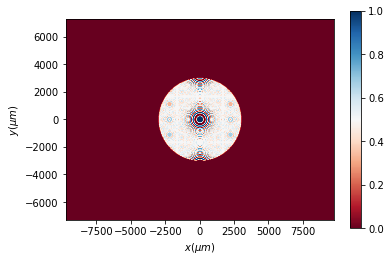

In [38]:
t1.fresnel_lens(r0=(0,0), radius=3*mm, focal=200*mm, kind='amplitude', phase=3.141592653589793, angle=0.0, mask=True)

mascara_unidad=t1.u
print(mascara_unidad.max())

t1.draw(kind='amplitude', has_colorbar='vertical');

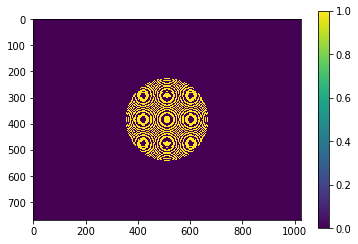

In [17]:
plt.imshow(mascara_unidad)
plt.colorbar()

### Now, we send several images at a given interval

In [36]:
num_images=16

grey_levels=np.linspace(1,255,num_images,dtype=float)
max_intensity=np.zeros_like(grey_levels, dtype=float)


Camera.StartLive(0)
for i,gl in enumerate(grey_levels):
    t1.u = gl/255*mascara_unidad
    slm.mask_to_rawImage(mask_XY=t1, kind='amplitude') 
    slm.send_image_screen(id_screen=id_holoeye, incr_time=500, verbose=False)
    
    Camera.SnapImage()
    # Get the image
    image = Camera.GetImage()
    max_intensity[i]=image.mean()
    
    plt.figure()

    plt.imshow(image)
    plt.axis('off') 
    plt.colorbar()
    image_name="callibration {:2f}.png".format(i)
    plt.savefig(image_name)
    plt.close()
    print(i, max_intensity[i])

    
cv2.destroyAllWindows()


(0, 139.1686274210612)
(1, 130.18167368570963)
(2, 129.85727310180664)
(3, 129.56934865315756)
(4, 129.68531036376953)
(5, 129.54519526163736)
(6, 129.5242919921875)
(7, 129.52365493774414)
(8, 129.45091120402017)
(9, 129.51539866129556)
(10, 129.54659016927084)
(11, 129.73831431070963)
(12, 129.6237360636393)
(13, 129.59222157796225)
(14, 129.56260681152344)
(15, 129.54300181070963)


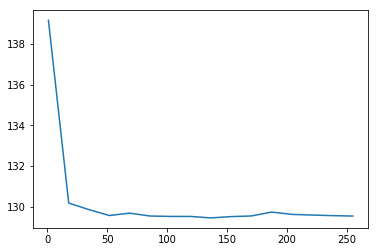

In [37]:
plt.figure()
plt.plot(grey_levels, max_intensity)